In [1]:
import numpy as np
from PIL import Image
import pandas as pd
import os
import imageio
from PIL import Image, ImageDraw
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def combine(cell_position, timepoint):
    timepoint = "{:03d}".format(timepoint)
    cell_position = "{:03d}".format(cell_position)
    file_path = f'/data/kpusteln/ChakrabartiLab/RAW_DATA001/xy{cell_position}c1t{timepoint}.tif'
    if os.path.exists(file_path):
        channel1 = cv2.imread(file_path, -1)
        channel2 = cv2.imread(f'/data/kpusteln/ChakrabartiLab/RAW_DATA001/xy{cell_position}c2t{timepoint}.tif', -1)
        channel3 = cv2.imread(f'/data/kpusteln/ChakrabartiLab/RAW_DATA001/xy{cell_position}c3t{timepoint}.tif', -1)


        rgb_image = cv2.merge((channel1, channel2, channel3))
        #convert to utf-8

        img = rgb_image.astype(np.uint8)
        return img
    else:
        print(f'File {file_path} does not exist')

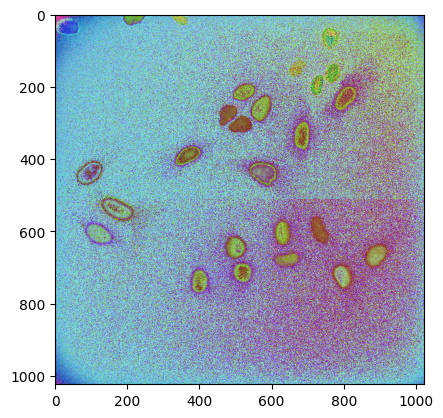

In [3]:
plt.imshow(combine(1, 1))

In [9]:
img = combine(1, 1)
img = Image.fromarray(img)
img.save('img.png')



In [4]:
# load data
data = pd.read_csv('/data/kpusteln/cells_project/traces.csv')
cell_positions = pd.read_csv('/data/kpusteln/cells_project/DishPosCellId_09052018.csv', sep = ';')

In [5]:
cell_positions

Well  Position  Cell_id
0        1         1      525
1        1         1      526
2        1         1      527
3        1         1      528
4        1         1      529
...    ...       ...      ...
1120    24       309      920
1121    24       309      921
1122    24       309      922
1123    24       309      923
1124    24       309      924

[1125 rows x 3 columns]

In [8]:
def load_coordinates(cell_position, timepoint, cell_positions):
    cells = cell_positions[cell_positions['Position'] == cell_position]
    cell_ids = list(cells['Cell_id'].values)
    rows = ['CentroidRow_CellId_' + str(cell_id) for cell_id in cell_ids]
    cols = ['CentroidCol_CellId_' + str(cell_id) for cell_id in cell_ids]
    y = data[cols].iloc[timepoint]
    x = data[rows].iloc[timepoint]
    coordinates = np.array([x, y]).T
    return coordinates

In [9]:
def draw_x(coordinates, im, timestep):
    for i, coordinate in enumerate(coordinates):
        if type(im) is np.ndarray:
            im = Image.fromarray(im)
        # Create an ImageDraw object
        draw = ImageDraw.Draw(im)
        
        # Specify the coordinates of the location you want to mark
        x = coordinate[0]
        y = coordinate[1]

        # Mark the location by drawing a crosshair
        draw.line((x-10, y, x+10, y), fill=(255,0,0), width=2)
        draw.line((x, y-10, x, y+10), fill=(255,0,0), width=2)

        # Save the modified image
    return im
        #im.save(f'marked_image_{timestep}.jpg')


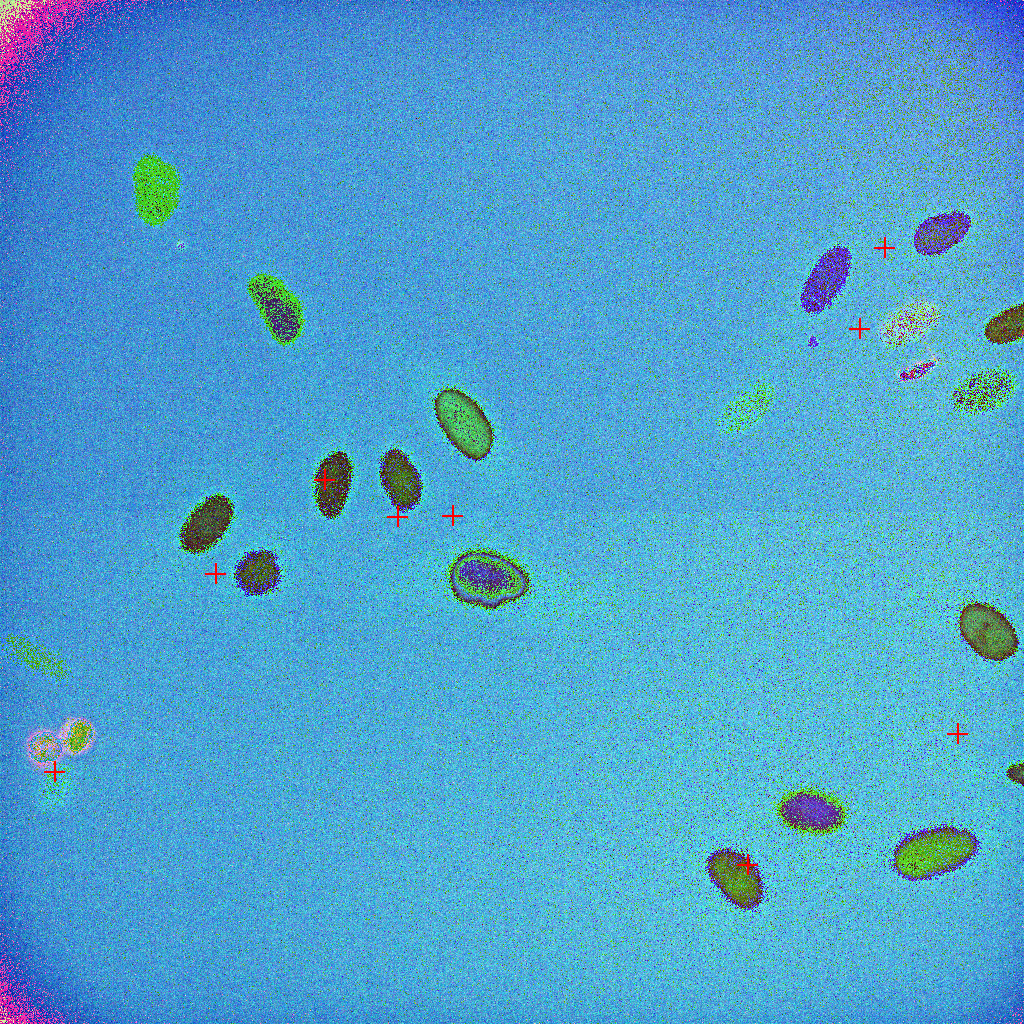

In [10]:
im = Image.open('combined.png')
coordinates = load_coordinates(194, 1, cell_positions)
draw_x(coordinates, im, 1)

In [11]:
len(cell_positions['Position'].unique())

149

In [13]:
videos = cell_positions['Position'].unique()
videos = list(videos)
with open("videos.txt", "w") as f:
    for item in videos:
        f.write("%s\n" % item)


In [12]:
cell_positions['Position'].max()

309

In [11]:
def prepare_video(cell_position):
    images = []
    for timestep in range(1, 233):
        print(timestep)
        try:
            im = combine(cell_position, timestep)
            coordinates = load_coordinates(cell_position, timestep, cell_positions)
            im = draw_x(coordinates, im, timestep)
            images.append(im)
        except:
            print('Finished video')
            imageio.mimsave(f'movie_{cell_position}.mp4', images)
            break
    imageio.mimsave(f'movie_{cell_position}.mp4', images)
    

In [30]:
def list_files(cell_position):
    file_list = []
    cell_position = "{:03d}".format(cell_position)
    for timepoint in range(1, 233):
        timepoint = "{:03d}".format(timepoint)
        file_path_c1 = f'/data/kpusteln/ChakrabartiLab/RAW_DATA001/xy{cell_position}c1t{timepoint}.tif'
        file_path_c2 = f'/data/kpusteln/ChakrabartiLab/RAW_DATA001/xy{cell_position}c2t{timepoint}.tif'
        file_path_c3 = f'/data/kpusteln/ChakrabartiLab/RAW_DATA001/xy{cell_position}c3t{timepoint}.tif'
        if os.path.exists(file_path_c1) and os.path.exists(file_path_c2) and os.path.exists(file_path_c3):
            file_list.extend([file_path_c1, file_path_c2, file_path_c3])
        else:
            print(f'File does not exist')
    return file_list

In [31]:
file_list = list_files(1)
file_list
with open("video_194.txt", "w") as f:
    for item in file_list:
        f.write("%s\n" % item)

File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist


In [23]:
file_list = list_files(194)

File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist
File does not exist


In [ ]:
file_list

In [ ]:
prepare_video(98)

In [107]:
# load matlab file
import scipy.io
from scipy.io import loadmat
mat_file = "/data/kpusteln/Tracking_Files/NaN_s10_tracking.mat"
mat_data = loadmat(mat_file)

In [108]:
mat_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon May 21 10:35:59 2018',
 '__version__': '1.0',
 '__globals__': [],
 'selectedGroup': array(['NaN'], dtype='<U3'),
 'selectedPosition': array([[10]], dtype=uint8),
 'databaseFile': array(['/Users/dhhh/aeg Dropbox/AEG AEG/Lab/Microscopy/AMBIO/2018/20180509/database.txt'],
       dtype='<U79'),
 'rawdatapath': array(['/Users/dhhh/aeg Dropbox/AEG AEG/Lab/Microscopy/AMBIO/2018/20180509/RAW_DATA'],
       dtype='<U75'),
 'None': MatlabOpaque([(b'centroidsDeath', b'MCOS', b'CentroidTimeseries', array([[3707764736],
                      [         2],
                      [         1],
                      [         1],
                      [         3],
                      [         1]], dtype=uint32))                                    ],
              dtype=[('s0', 'O'), ('s1', 'O'), ('s2', 'O'), ('arr', 'O')]),
 '__function_workspace__': array([[ 0,  1, 73, ...,  0,  0,  0]], dtype=uint8)}